# DL for nonlinear data, two layers, first layer has 2 neurons

In [1]:
! pip install -q -U tensor-sensor

In [2]:
import numpy as np
import pandas as pd
import torch
import matplotlib.pyplot as plt
import tsensor

%config InlineBackend.figure_format = 'retina'

dtype = torch.float

## Nonlinear data

In [12]:
# e^-x
n = 20
df = pd.DataFrame()
df['x'] = np.linspace(0,5,num=n)
df['y'] = np.exp(-df.x)
df.head(5)

,x,y
0,0.000000,1.000000
1,0.263158,0.768621
2,0.526316,0.590778
3,0.789474,0.454084
4,1.052632,0.349018


In [4]:
n = 20
df = pd.DataFrame()
df['x'] = np.linspace(500,1000,num=n)
df['y'] = ((1-(df.x-750)**2)/50 + 1250)/1250
df.head(3)

,x,y
0,500.000000,0.000016
1,526.315789,0.199462
2,552.631579,0.376747


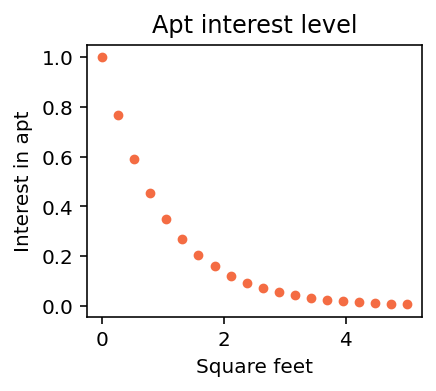

In [13]:
fig, ax = plt.subplots(figsize=(3,2.5))

ax.scatter(df.x, df.y, s=15, color='#F46C43')
# ax.set_xlim(500,1000)
ax.set_xlabel("Square feet")
ax.set_ylabel("Interest in apt")
plt.title("Apt interest level")

plt.show()

Epoch     0 MSE loss      28.2504    MAE    22.51
Epoch  1000 MSE loss      14.9905    MAE    15.88
Epoch  2000 MSE loss       6.3529    MAE    10.20
Epoch  3000 MSE loss       2.6019    MAE     6.13
Epoch  4000 MSE loss       1.5502    MAE     4.30
Epoch  5000 MSE loss       0.9195    MAE     3.18
Epoch  6000 MSE loss       0.5137    MAE     2.25
Epoch  7000 MSE loss       0.2696    MAE     1.49
Epoch  8000 MSE loss       0.1428    MAE     1.15
Epoch  9000 MSE loss       0.0834    MAE     0.95
Epoch 10000 MSE loss       0.0502    MAE     0.77
Epoch 11000 MSE loss       0.0280    MAE     0.57
Epoch 12000 MSE loss       0.0136    MAE     0.39
Epoch 13000 MSE loss       0.0058    MAE     0.24
Epoch 14000 MSE loss       0.0029    MAE     0.18
Epoch 15000 MSE loss       0.0023    MAE     0.18
LAST        MSE loss       0.0023    MAE     0.18


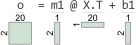

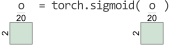

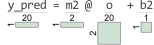

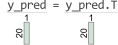

Loss tensor(0.0023)


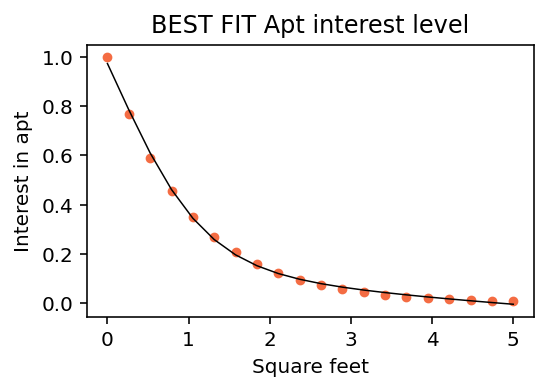

In [17]:
X = torch.tensor(df.x, dtype=dtype).reshape(n,1)
Y = torch.tensor(df.y, dtype=dtype).reshape(n,1)

# Randomly initialize weights
m1 = torch.randn(2, 1, dtype=dtype, requires_grad=True) # 2 neurons in layer 1
b1 = torch.randn(2, 1, dtype=dtype, requires_grad=True)
m2 = torch.randn(1, 2, dtype=dtype, requires_grad=True) # 1 neuron in layer 2
b2 = torch.randn(1, 1, dtype=dtype, requires_grad=True)

tolerance = 0#2.1555
learning_rate = .0002
optimizer = torch.optim.Adam([m1,b1,m2,b2], lr=learning_rate)
nepochs=15000
for epoch in range(nepochs+1):
    # Forward pass over all x,y pairs: compute predicted y
    with tsensor.clarify():
        o = m1 @ X.T + b1
        o = torch.sigmoid(o)
        y_pred = m2 @ o + b2
        y_pred = y_pred.T
        loss = torch.sum((y_pred - Y)**2)
    if loss < tolerance:
        break
    if epoch % 1000 == 0:
        with torch.no_grad():
            mae = torch.sum(torch.abs(y_pred - Y))
            print(f"Epoch {epoch:5d} MSE loss {loss.detach().item():12.4f}    MAE {mae:8.2f}")

    # Backprop to compute gradients of w1, w2, ... with respect to loss
    optimizer.zero_grad()
    loss.backward() # autograd computes w1.grad, b1.grad, ...
    optimizer.step()
    
m1 = m1.detach()
b1 = b1.detach()
m2 = m2.detach()
b2 = b2.detach()
print(f"LAST        MSE loss {loss.detach().item():12.4f}    MAE {mae:8.2f}")

fig, ax = plt.subplots(figsize=(4,2.5))

with tsensor.explain(): # Draw shape of tensors
    o = m1 @ X.T + b1
    o = torch.sigmoid(o)
    y_pred = m2 @ o + b2
    y_pred = y_pred.T

loss = torch.sum((y_pred - Y)**2)
print("Loss", loss)
        
ax.scatter(df.x, df.y, s=15, color='#F46C43')
ax.plot(df.x, y_pred, lw=.75, color='black')
# ax.text(525,-.18, f"$y = {m2:4.4f}*relu({m1:4.2f}x+{b1:4.2f}) + {b2:4.2f}$")
#ax.text(750,.25, f"$loss = {loss:.4f}$", horizontalalignment="center")
# ax.set_xlim(500,1000)
# ax.set_ylim(-.25,1.05)
ax.set_xlabel("Square feet")
ax.set_ylabel("Interest in apt")
plt.title("BEST FIT Apt interest level")

plt.show()

In [25]:
torch.sigmoid(torch.tensor(-100,dtype=float))

tensor(3.7201e-44, dtype=torch.float64)